In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline

#### Data contains:

*    age - age in years
*    sex - (1 = male; 0 = female)
*    cp - chest pain type
*    trestbps - resting blood pressure (in mm Hg on admission to the hospital)
*    chol - serum cholestoral in mg/dl
*    fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
*    restecg - resting electrocardiographic results
*    thalach - maximum heart rate achieved
*    exang - exercise induced angina (1 = yes; 0 = no)
*    oldpeak - ST depression induced by exercise relative to rest
*    slope - the slope of the peak exercise ST segment
*    ca - number of major vessels (0-3) colored by flourosopy
*    thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
*    target - have disease or not (1=yes, 0=no)



In [3]:
dataset_path = pd.read_csv("heart.csv")
dataset = dataset_path.copy()

In [4]:
dataset.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
dataset.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
no_disease = len(dataset[dataset.target == 0])
have_disease = len(dataset[dataset.target == 1])

print("Percentage Patient have disease: {:.2f}%".format((have_disease / len(dataset.target) * 100)))
print("Percentage Patient haven't disease: {:.2f}%".format((no_disease / len(dataset.target) * 100)))

Percentage Patient have disease: 54.46%
Percentage Patient haven't disease: 45.54%


In [7]:
cp_ = pd.get_dummies(dataset['cp'], prefix='cp')
thal_ = pd.get_dummies(dataset['thal'], prefix='thal')
slope_ = pd.get_dummies(dataset['thal'], prefix='thal')

In [8]:
frames = [dataset, cp_, thal_, slope_]
dataset = pd.concat(frames, axis=1)
dataset.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ...  \
0   63    1   3       145   233    1        0      150      0      2.3  ...   
1   37    1   2       130   250    0        1      187      0      3.5  ...   
2   41    0   1       130   204    0        0      172      0      1.4  ...   
3   56    1   1       120   236    0        1      178      0      0.8  ...   
4   57    0   0       120   354    0        1      163      1      0.6  ...   

   cp_2  cp_3  thal_0  thal_1  thal_2  thal_3  thal_0  thal_1  thal_2  thal_3  
0     0     1       0       1       0       0       0       1       0       0  
1     1     0       0       0       1       0       0       0       1       0  
2     0     0       0       0       1       0       0       0       1       0  
3     0     0       0       0       1       0       0       0       1       0  
4     0     0       0       0       1       0       0       0       1       0  

[5 rows x 26 columns]

In [9]:
dataset = dataset.drop(columns=['cp', 'thal', 'slope'])
dataset.head()

age  sex  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ca  ...  \
0   63    1       145   233    1        0      150      0      2.3   0  ...   
1   37    1       130   250    0        1      187      0      3.5   0  ...   
2   41    0       130   204    0        0      172      0      1.4   0  ...   
3   56    1       120   236    0        1      178      0      0.8   0  ...   
4   57    0       120   354    0        1      163      1      0.6   0  ...   

   cp_2  cp_3  thal_0  thal_1  thal_2  thal_3  thal_0  thal_1  thal_2  thal_3  
0     0     1       0       1       0       0       0       1       0       0  
1     1     0       0       0       1       0       0       0       1       0  
2     0     0       0       0       1       0       0       0       1       0  
3     0     0       0       0       1       0       0       0       1       0  
4     0     0       0       0       1       0       0       0       1       0  

[5 rows x 23 columns]

In [10]:
y = dataset.target.values
X = dataset.drop(['target'], axis=1)

In [11]:
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values
X.head()

age  sex  trestbps      chol  fbs  restecg   thalach  exang   oldpeak  \
0  0.708333  1.0  0.481132  0.244292  1.0      0.0  0.603053    0.0  0.370968   
1  0.166667  1.0  0.339623  0.283105  0.0      0.5  0.885496    0.0  0.564516   
2  0.250000  0.0  0.339623  0.178082  0.0      0.0  0.770992    0.0  0.225806   
3  0.562500  1.0  0.245283  0.251142  0.0      0.5  0.816794    0.0  0.129032   
4  0.583333  0.0  0.245283  0.520548  0.0      0.5  0.702290    1.0  0.096774   

    ca  ...  cp_2  cp_3  thal_0  thal_1  thal_2  thal_3  thal_0  thal_1  \
0  0.0  ...   0.0   1.0     0.0     1.0     0.0     0.0     0.0     1.0   
1  0.0  ...   1.0   0.0     0.0     0.0     1.0     0.0     0.0     0.0   
2  0.0  ...   0.0   0.0     0.0     0.0     1.0     0.0     0.0     0.0   
3  0.0  ...   0.0   0.0     0.0     0.0     1.0     0.0     0.0     0.0   
4  0.0  ...   0.0   0.0     0.0     0.0     1.0     0.0     0.0     0.0   

   thal_2  thal_3  
0     0.0     0.0  
1     1.0     0.0  
2     1.0     0.0  
3     1.0     0.0  
4     1.0     0.0  

[5 rows x 22 columns]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [69]:
from sklearn.model_selection import cross_val_score

# Logistic Regression

In [79]:
lr = LogisticRegression(solver='lbfgs')
lr_scores = cross_val_score(lr, x_train, y_train, cv=5)
#lr.fit(x_train, y_train)
print("Linear Regression Algorithm Accurancy Score: {:.2f}% +/- {:.6f}".format(lr_scores.mean()*100, lr_scores.std()*100))

Linear Regression Algorithm Accurancy Score: 80.60% +/- 1.850976


# Random Forest

In [80]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf_scores = cross_val_score(rf, x_train, y_train, cv=5)
#rf.fit(x_train, y_train)
print("Random Forest Accurancy Score: {:.2f}% +/- {:.6f}".format(rf_scores.mean()*100, rf_scores.std()*100))

Random Forest Accurancy Score: 80.23% +/- 5.147383


# SVM

In [81]:
from sklearn import svm

clf = svm.SVC(kernel='sigmoid', gamma='scale')
scores = cross_val_score(clf, x_train, y_train, cv=5)
#clf.fit(x_train, y_train)
print("Support Vector Machine Accuracy Score: {:.2f}% +/- {:.6f}".format(scores.mean()*100, scores.std()*100))

Support Vector Machine Accuracy Score: 80.18% +/- 2.655393


# Perceptron

In [82]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron

pct = Perceptron(tol=1e-3, random_state=0)
pct_scores = cross_val_score(pct, x_train, y_train, cv=5)
#pct.fit(x_train, y_train)
print("Support Vector Machine Accuracy Score: {:.2f}% +/- {:.6f}".format(pct_scores.mean()*100, pct_scores.std()*100))

Support Vector Machine Accuracy Score: 74.75% +/- 8.159010


In [44]:
y_lr = lr.predict(x_test)
y_rf = rf.predict(x_test)
y_svm = clf.predict(x_test)

## Final Result

In [47]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_lr)
cm_rf = confusion_matrix(y_test, y_rf)
cm_svm = confusion_matrix(y_test, y_svm)

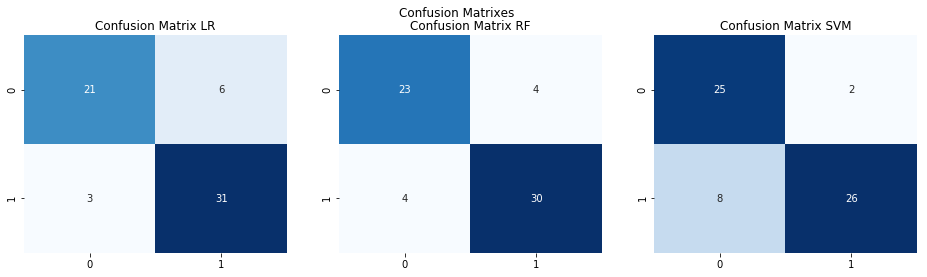

In [50]:
plt.figure(figsize=(16, 4))

plt.suptitle("Confusion Matrixes")
#plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(1,3,1)
plt.title("Confusion Matrix LR")
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d', cbar=False)

plt.subplot(1,3,2)
plt.title("Confusion Matrix RF")
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d', cbar=False)

plt.subplot(1,3,3)
plt.title("Confusion Matrix SVM")
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d', cbar=False)


plt.show()

## Deep Learning (Neural network)

In [18]:
from __future__ import absolute_import, division, print_function

import pathlib

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.13.1


In [19]:
def build_model():
    model = keras.Sequential([
        layers.Dense(32, activation=tf.nn.relu, input_shape=[len(x_train.keys())], kernel_initializer='random_normal'),
        layers.Dense(32, activation=tf.nn.relu, kernel_initializer='random_normal'),
        layers.Dense(32, activation=tf.nn.relu, kernel_initializer='random_normal'),
        layers.Dense(1, activation=tf.nn.sigmoid, kernel_initializer='random_normal')
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [20]:
model = build_model()

Instructions for updating:
Colocations handled automatically by placer.


In [21]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')
        
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=50)

history = model.fit(x_train, y_train, epochs=250, validation_split=0.2, verbose=0, callbacks=[early_stop, PrintDot()])

Instructions for updating:
Use tf.cast instead.

....................................................................................................
....................................................................................................
.............................

In [22]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss       acc  val_loss   val_acc  epoch
224  0.283765  0.891192  0.407221  0.857143    224
225  0.270209  0.896373  0.362720  0.836735    225
226  0.284485  0.865285  0.364290  0.836735    226
227  0.295579  0.854922  0.370001  0.836735    227
228  0.277313  0.880829  0.385881  0.857143    228

In [23]:
eval_model = model.evaluate(x_train, y_train)
print("Model result -> Loss: {:.2f} Accurancy: {:.2f}%".format(eval_model[0], eval_model[1]*100))

242/242 [==============================] - 0s 33us/sample - loss: 0.2915 - acc: 0.8802
Model result -> Loss: 0.29 Accurancy: 88.02%


In [24]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accurancy')
    plt.plot(hist['epoch'], hist['acc'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_acc'],
           label = 'Val Error')
    #plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
    #plt.ylim([0,20])
    plt.legend()
    plt.show()

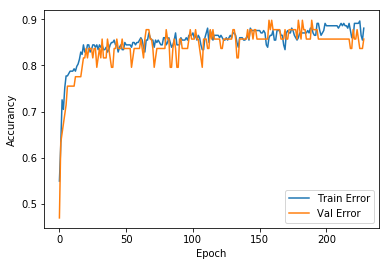

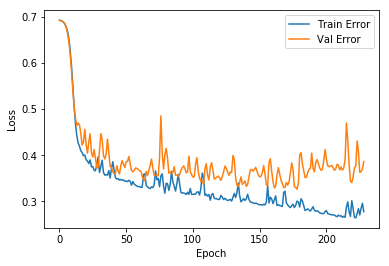

In [25]:
plot_history(history)

In [26]:
y_pred = model.predict(x_test)
y_pred = (y_pred>0.5)

<Figure size 432x288 with 0 Axes>

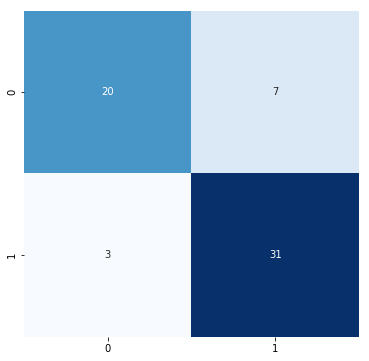

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.suptitle("Confusion Matrix")
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.show()

In [28]:
test_acc = cm[0, 0] + cm[1, 1]
not_test_acc = cm[1, 0] + cm[0, 1]
print("Test accurancy: {:.2f}%".format(100 - (not_test_acc / test_acc)*100))

Test accurancy: 80.39%
